# Exploration of trained neural networks

- overall accuracy by model
- average top probability by model
- confusion matrices
- within class accuracy
- wihtin class avg top probability
- distributions of probabilities per class
- multiclass - distribution of sum of probabilities per chip

In [2]:
import json
import pandas
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from itertools import product
import urbangrammar_graphics as ugg

In [13]:
sns.set_style('white')

In [4]:
path = "../../ai/"

In [5]:
models = glob(path + "*")

In [6]:
models

['../../ai/gb_8_multiclass',
 '../../ai/gb_8',
 '../../ai/gb_64',
 '../../ai/gb_16',
 '../../ai/gb_32',
 '../../ai/gb_8_shuffled',
 '../../ai/gb_64_shuffled',
 '../../ai/gb_32_multiclass',
 '../../ai/gb_16_multiclass',
 '../../ai/gb_64_multiclass',
 '../../ai/gb_16_shuffled',
 '../../ai/gb_32_shuffled']

In [7]:
cols = ['model', 'meta_chip_size', 'perf_model_accuracy_train', 'perf_avg_prob_top_train', 'perf_model_accuracy_val', 'perf_avg_prob_top_val']
results = pandas.DataFrame(columns=cols)
for model in models:
    with open(glob(model + "/json/*.json")[0], 'r') as f:
        r = json.load(f)
        if "multiclass" in model:
            m = "multiclass"
        elif "shuffled" in model:
            m = "slided"
        else:
            m = "default"
        results.loc[model[9:]] = [m] + [
            r[c] for c in cols[1:]
        ]

In [9]:
results['model'] = pandas.Categorical(results['model'], categories=["default", "slided", "multiclass"], ordered=True)

In [10]:
results

,model,meta_chip_size,perf_model_accuracy_train,perf_avg_prob_top_train,perf_model_accuracy_val,perf_avg_prob_top_val
gb_8_multiclass,multiclass,8,0.315847,0.204467,0.305411,0.199193
gb_8,default,8,0.288741,0.190248,0.293273,0.192097
gb_64,default,64,0.567528,0.469644,0.513429,0.435189
gb_16,default,16,0.368673,0.254693,0.355838,0.247009
gb_32,default,32,0.480403,0.363844,0.429497,0.327276
gb_8_shuffled,slided,8,0.301719,0.197889,0.297283,0.196153
gb_64_shuffled,slided,64,0.739600,0.685450,0.422244,0.385928
gb_32_multiclass,multiclass,32,0.499721,0.354392,0.435494,0.316472
gb_16_multiclass,multiclass,16,0.440343,0.314082,0.361119,0.270722
gb_64_multiclass,multiclass,64,0.838068,0.637506,0.738018,0.550745


In [16]:
ugg.COLORS

[(0.19921875, 0.203125, 0.1953125),
 (0.23046875, 0.4296875, 0.55078125),
 (0.73828125, 0.35546875, 0.30859375),
 (0.5625, 0.640625, 0.4921875),
 (0.9375, 0.78125, 0.34375),
 (0.58203125, 0.3984375, 0.4296875)]

## overall accuracy by model

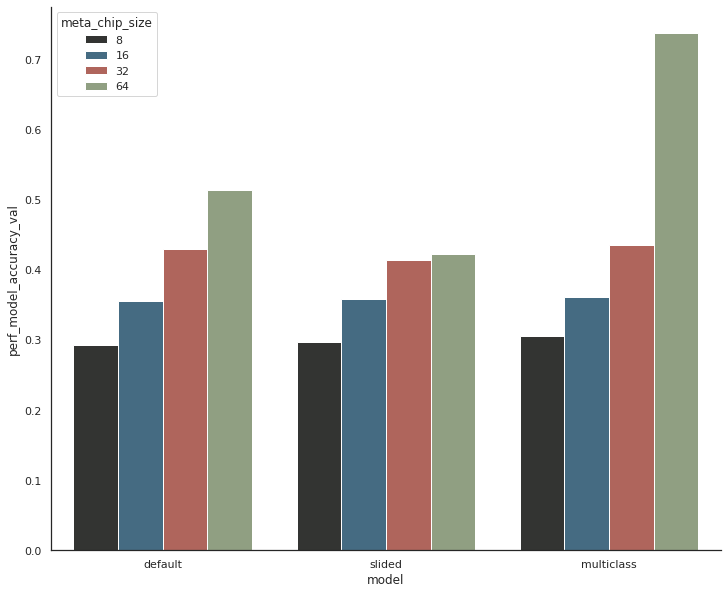

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=results, x='model', y='perf_model_accuracy_val', hue="meta_chip_size", palette=ugg.COLORS)
sns.despine()
plt.savefig("figs/per_accuracy.png")

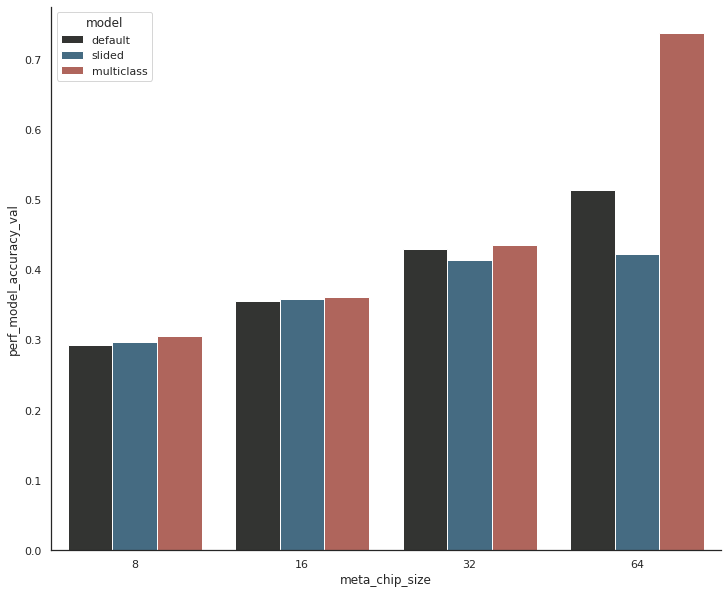

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.barplot(data=results, x='meta_chip_size', y='perf_model_accuracy_val', hue="model", palette=ugg.COLORS)
sns.despine()
plt.savefig("figs/per_accuracy_by_size.png")

## average top probability by model

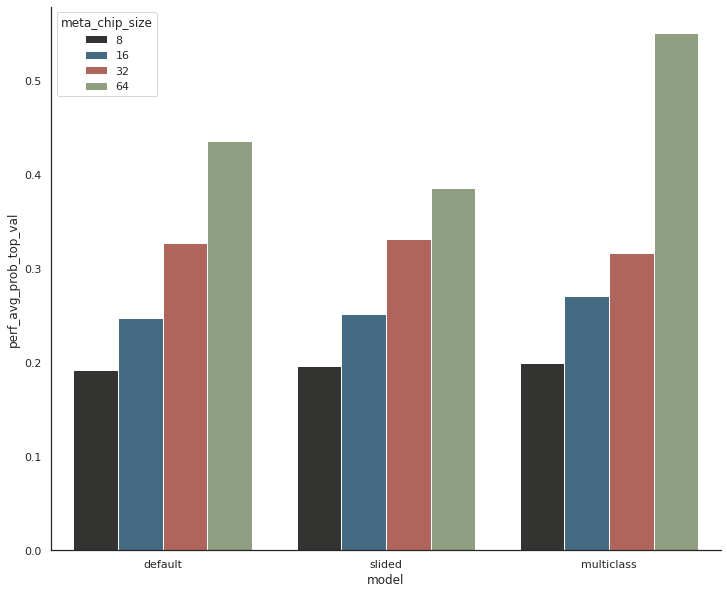

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.barplot(data=results, x='model', y='perf_avg_prob_top_val', hue="meta_chip_size", palette=ugg.COLORS)
sns.despine()
plt.savefig("figs/per_prob.png")

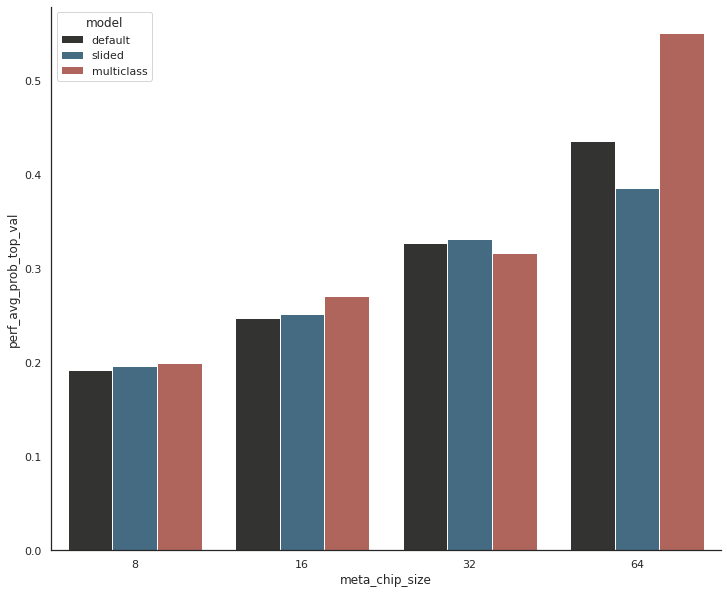

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.barplot(data=results, x='meta_chip_size', y='perf_avg_prob_top_val', hue="model", palette=ugg.COLORS)
sns.despine()
plt.savefig("figs/per_prob_by_size.png")

Average top probability vs accuracy

<AxesSubplot:xlabel='perf_avg_prob_top_val', ylabel='perf_model_accuracy_val'>

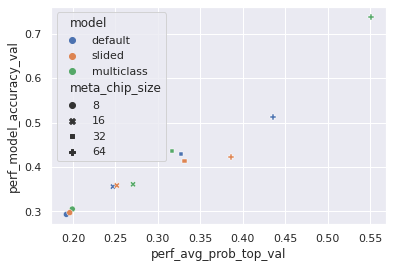

In [77]:
sns.scatterplot(data=results, x='perf_avg_prob_top_val', y='perf_model_accuracy_val', hue='model', style="meta_chip_size")

In [126]:
for e, cl in enumerate(sorted(r['meta_class_names'])):
    print(e, cl)

0 Accessible suburbia
1 Connected residential neighbourhoods
2 Countryside agriculture
3 Dense residential neighbourhoods
4 Dense urban neighbourhoods
5 Disconnected suburbia
6 Gridded residential quarters
7 Open sprawl
8 Urban buffer
9 Urbanity
10 Warehouse_Park land
11 Wild countryside


## Confusion matrices

/tmp/ipykernel_54985/1677395836.py:21: RuntimeWarning: invalid value encountered in true_divide
  a = a / a.sum(axis=1)[:, numpy.newaxis]


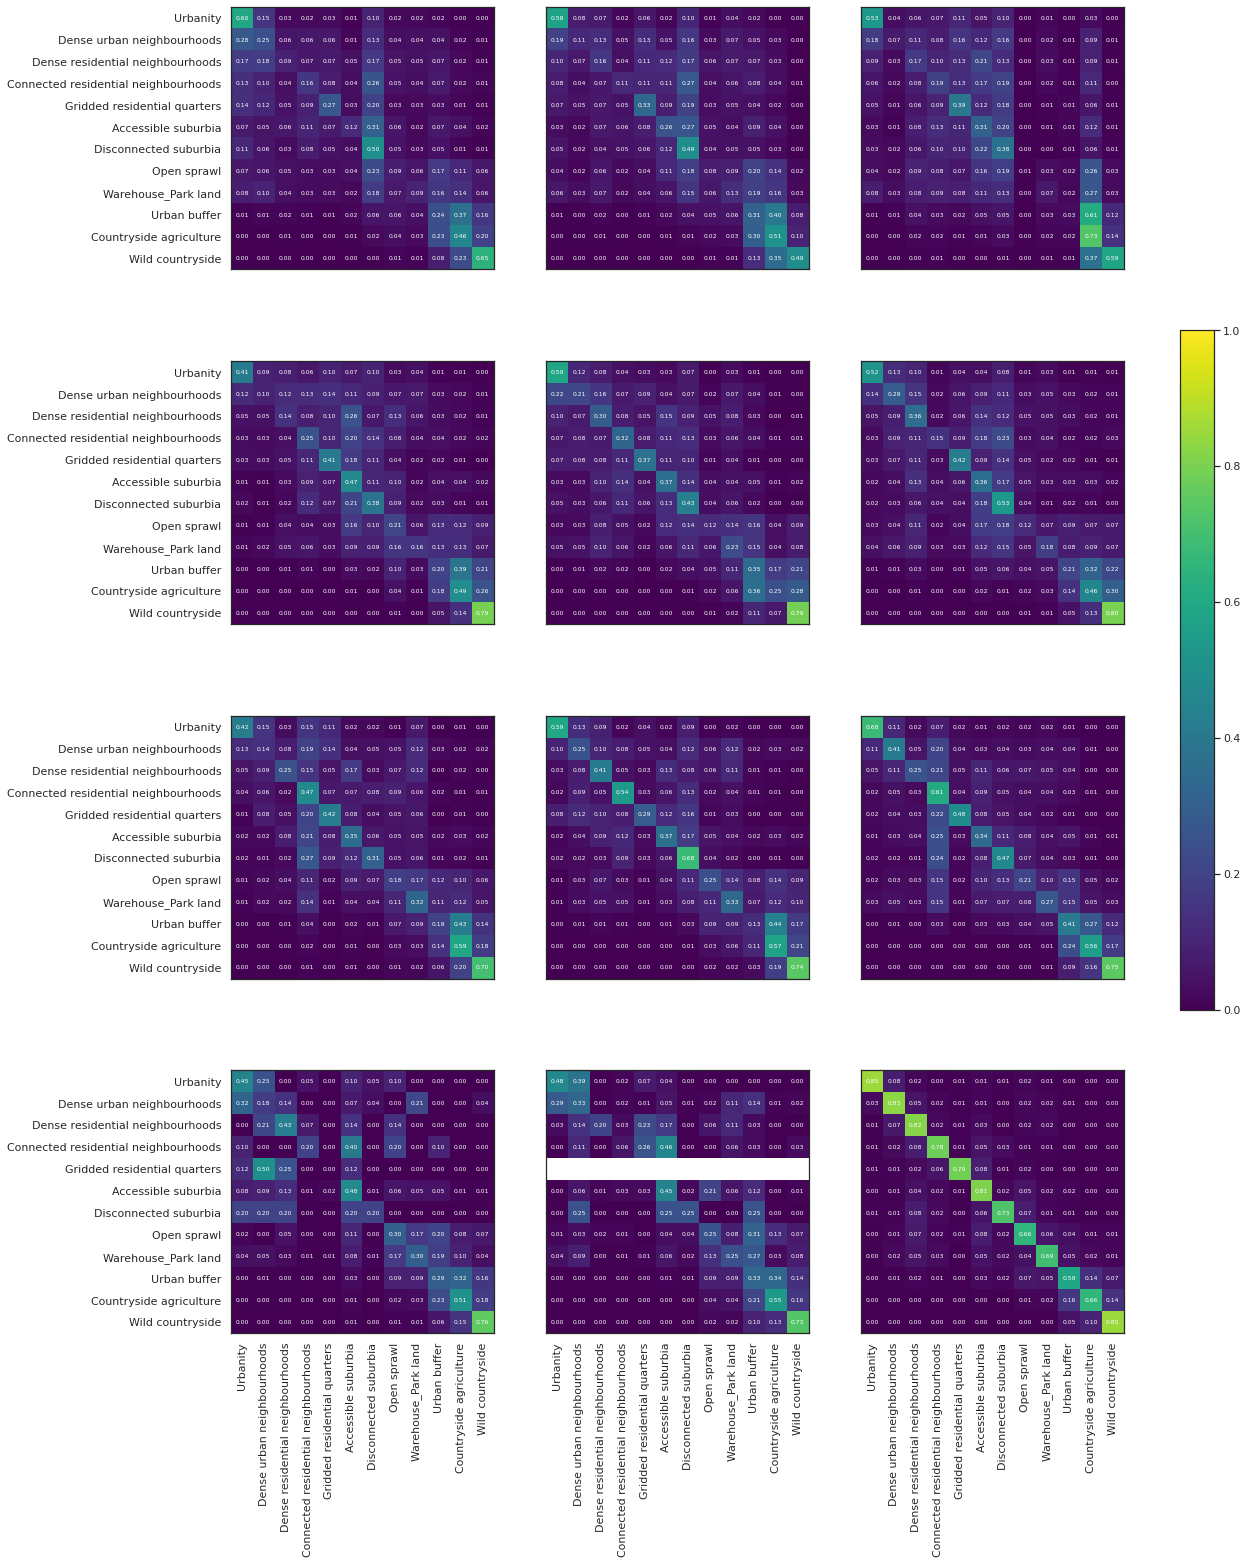

In [25]:
fig, axs = plt.subplots(4, 3, figsize=(20, 25), sharex=True, sharey=True)
order = numpy.array([9, 4, 3, 1, 6, 0, 5, 7, 10, 8, 2, 11], dtype=int)
for model in models:
    if "8" in model:
        row = 0
    elif "16" in model:
        row = 1
    elif "32" in model:
        row = 2
    else:
        row = 3
    if "shuffled" in model:
        col = 1
    elif "multi" in model:
        col = 2
    else:
        col = 0
    with open(glob(model + "/json/*.json")[0], 'r') as f:
        r = json.load(f)
        a = pandas.DataFrame((r['perf_confusion_val'])).iloc[order, order].values
        a = a / a.sum(axis=1)[:, numpy.newaxis]
        im = axs[row, col].imshow(a, cmap="viridis", vmin=0, vmax=1)
        for k, j in product(range(12), range(12)):
            axs[row, col].text(j, k, "{:.2f}".format(a[k, j]),
                           ha="center", va="center", color="w", size=6)
    axs[row, col].tick_params('x', labelrotation=90)
ticks = numpy.array(sorted(r['meta_class_names']))[order]
plt.setp(axs, xticks=range(12), yticks=range(12), xticklabels=ticks, yticklabels=ticks)
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=.5)
plt.savefig('figs/confusions.png', bbox_inches='tight')

([<matplotlib.axis.YTick at 0x7fcb54da3be0>,
 [Text(0, 0, 'Urbanity'),
  Text(0, 1, 'Dense urban neighbourhoods'),
  Text(0, 2, 'Dense residential neighbourhoods'),
  Text(0, 3, 'Connected residential neighbourhoods'),
  Text(0, 4, 'Gridded residential quarters'),
  Text(0, 5, 'Accessible suburbia'),
  Text(0, 6, 'Disconnected suburbia'),
  Text(0, 7, 'Open sprawl'),
  Text(0, 8, 'Warehouse_Park land'),
  Text(0, 9, 'Urban buffer'),
  Text(0, 10, 'Countryside agriculture'),
  Text(0, 11, 'Wild countryside')])

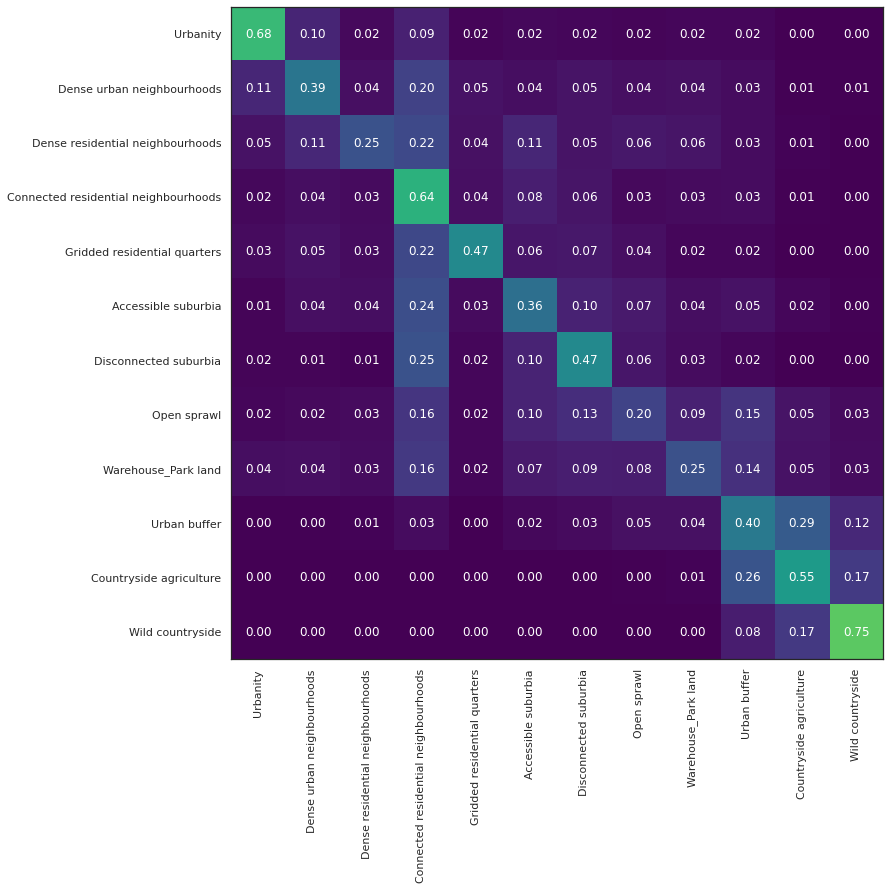

In [26]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12, 12))

order = numpy.array([9, 4, 3, 1, 6, 0, 5, 7, 10, 8, 2, 11], dtype=int)

with open(glob("../../ai/gb_32_multiclass" + "/json/*.json")[0], 'r') as f:
    r = json.load(f)
    a = pandas.DataFrame(r['perf_confusion_secret']).iloc[order, order].values
    a = a / (a.sum(axis=1)[:, numpy.newaxis] + .0000001)
    im = ax.imshow(a, cmap="viridis", vmin=0, vmax=1)
    for k, j in product(range(12), range(12)):
        ax.text(j, k, "{:.2f}".format(a[k, j]),
                       ha="center", va="center", color="w")
        
ticks = numpy.array(sorted(r['meta_class_names']))[order]
plt.xticks(range(12),ticks, rotation=90)
plt.yticks(range(12),ticks)

## Within class accuracy

In [142]:
cols = ['model', 'meta_chip_size'] + sorted(r['meta_class_names'])
wc_accuracy = pandas.DataFrame(columns=cols)
for model in models:
    with open(glob(model + "/json/*.json")[0], 'r') as f:
        r = json.load(f)
        if "multiclass" in model:
            m = "multiclass"
        elif "shuffled" in model:
            m = "slided"
        else:
            m = "default"
        wc_accuracy.loc[model[9:]] = [m, r['meta_chip_size']] + r['perf_within_class_accuracy_val']
wc_accuracy['model'] = pandas.Categorical(wc_accuracy['model'], categories=["default", "slided", "multiclass"], ordered=True)

In [162]:
wc_accuracy

,model,meta_chip_size,Accessible suburbia,Connected residential neighbourhoods,Countryside agriculture,Dense residential neighbourhoods,Dense urban neighbourhoods,Disconnected suburbia,Gridded residential quarters,Open sprawl,Urban buffer,Urbanity,Warehouse_Park land,Wild countryside
gb_8_multiclass,multiclass,8,0.308699,0.190781,0.727232,0.166667,0.070328,0.378846,0.394604,0.005319,0.029426,0.533008,0.068804,0.588198
gb_8,default,8,0.120800,0.158800,0.457200,0.092800,0.245600,0.496800,0.273296,0.085200,0.245000,0.598000,0.094200,0.648200
gb_64,default,64,0.480000,0.200000,0.513200,0.428571,0.178571,0.200000,0.000000,0.302752,0.294200,0.450000,0.297980,0.755400
gb_16,default,16,0.469000,0.249815,0.491000,0.143476,0.096812,0.382925,0.405229,0.209800,0.202600,0.411181,0.156200,0.794000
gb_32,default,32,0.353591,0.472727,0.592000,0.246212,0.140078,0.314815,0.418182,0.184286,0.191600,0.422857,0.322924,0.700000
gb_8_shuffled,slided,8,0.256000,0.114000,0.508400,0.159800,0.113600,0.490400,0.332200,0.079200,0.310800,0.577400,0.131000,0.494600
gb_64_shuffled,slided,64,0.445702,0.057143,0.545600,0.200000,0.329066,0.250000,0.000000,0.252200,0.326000,0.476476,0.246000,0.732800
gb_32_multiclass,multiclass,32,0.340009,0.612177,0.557045,0.254578,0.409987,0.467851,0.484685,0.209699,0.406838,0.680000,0.270248,0.749288
gb_16_multiclass,multiclass,16,0.361702,0.147139,0.460736,0.357702,0.291581,0.534066,0.423154,0.118982,0.207139,0.517451,0.184006,0.800000
gb_64_multiclass,multiclass,64,0.807492,0.777922,0.662219,0.818676,0.831131,0.725773,0.787986,0.657525,0.586236,0.854430,0.694418,0.848441


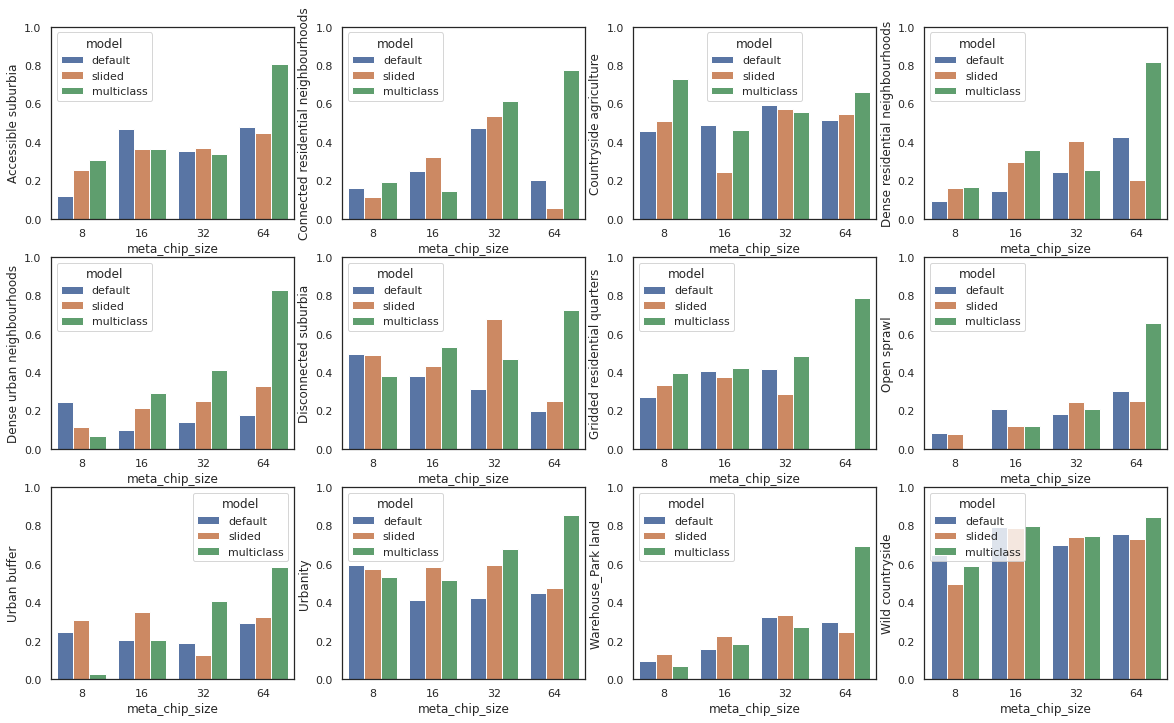

In [150]:
fig, axs = plt.subplots(3, 4, figsize=(20, 12))
for ax, col in zip(axs.flatten(), wc_accuracy.columns[2:]):
    sns.barplot(data=wc_accuracy, x='meta_chip_size', hue='model', y=col, ax=ax)
    ax.set_ylim(0, 1)

## Within class avg top probability

In [152]:
cols = ['model', 'meta_chip_size'] + sorted(r['meta_class_names'])
avg_prob = pandas.DataFrame(columns=cols)
for model in models:
    with open(glob(model + "/json/*.json")[0], 'r') as f:
        r = json.load(f)
        if "multiclass" in model:
            m = "multiclass"
        elif "shuffled" in model:
            m = "slided"
        else:
            m = "default"
        avg_prob.loc[model[9:]] = [m, r['meta_chip_size']] + r['perf_within_class_avg_prob_top_val']
avg_prob['model'] = pandas.Categorical(avg_prob['model'], categories=["default", "slided", "multiclass"], ordered=True)

In [158]:
avg_prob["Gridded residential quarters"] = avg_prob["Gridded residential quarters"].fillna(0)

In [163]:
avg_prob

,model,meta_chip_size,Accessible suburbia,Connected residential neighbourhoods,Countryside agriculture,Dense residential neighbourhoods,Dense urban neighbourhoods,Disconnected suburbia,Gridded residential quarters,Open sprawl,Urban buffer,Urbanity,Warehouse_Park land,Wild countryside
gb_8_multiclass,multiclass,8,0.168503,0.147969,0.258929,0.136705,0.123033,0.163590,0.240695,0.085466,0.175560,0.290268,0.092448,0.399493
gb_8,default,8,0.113395,0.137579,0.226941,0.120526,0.182241,0.187607,0.186742,0.105326,0.180808,0.314428,0.119342,0.429317
gb_64,default,64,0.475017,0.192649,0.406655,0.420018,0.195911,0.194697,0.003535,0.292815,0.310662,0.468320,0.289856,0.602081
gb_16,default,16,0.241875,0.191005,0.291244,0.134265,0.134791,0.216931,0.282975,0.148057,0.216279,0.230750,0.133307,0.564867
gb_32,default,32,0.275395,0.353204,0.366118,0.176142,0.159998,0.239833,0.324158,0.175554,0.238788,0.317560,0.253565,0.503108
gb_8_shuffled,slided,8,0.153388,0.126484,0.272700,0.130254,0.136149,0.201637,0.215469,0.115367,0.210639,0.316599,0.121538,0.353607
gb_64_shuffled,slided,64,0.443730,0.054517,0.434726,0.191138,0.329020,0.249997,0.000000,0.247418,0.338947,0.474311,0.240826,0.587310
gb_32_multiclass,multiclass,32,0.214496,0.358172,0.403950,0.178573,0.272646,0.268607,0.331460,0.164295,0.307558,0.557502,0.209292,0.616979
gb_16_multiclass,multiclass,16,0.199081,0.128123,0.319330,0.247173,0.236026,0.287505,0.301686,0.119045,0.188537,0.409874,0.152945,0.621500
gb_64_multiclass,multiclass,64,0.574463,0.536827,0.553145,0.568477,0.625051,0.460006,0.526348,0.405437,0.443105,0.778360,0.459681,0.784908


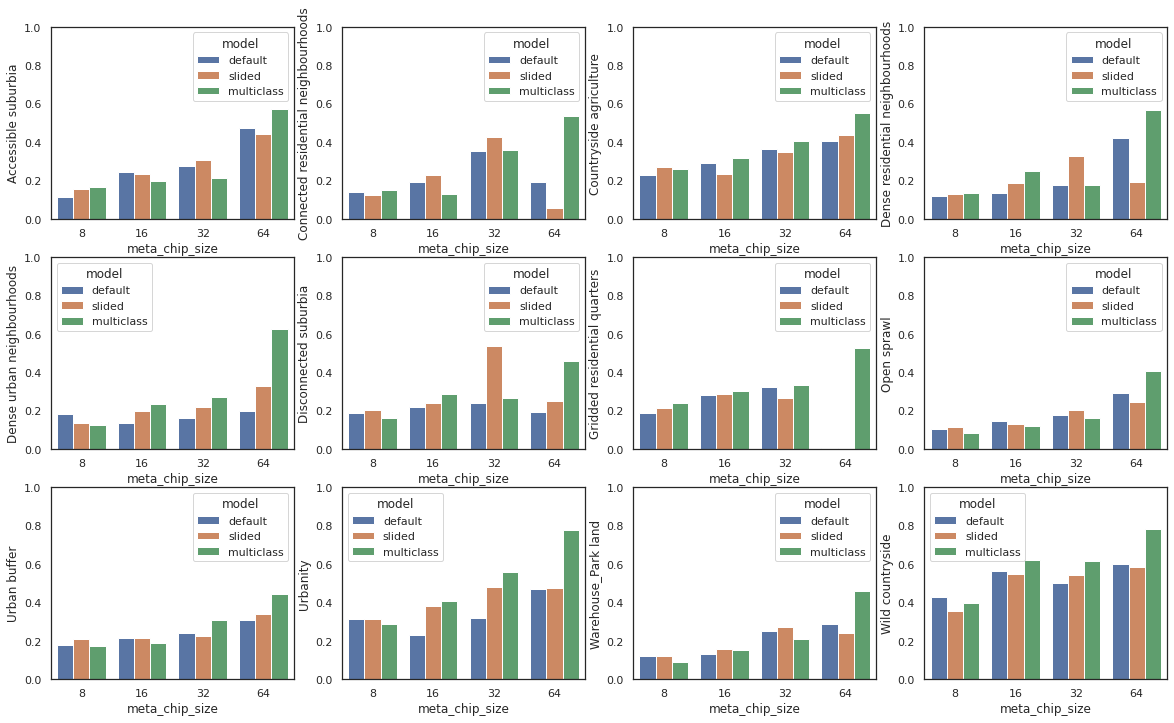

In [159]:
fig, axs = plt.subplots(3, 4, figsize=(20, 12))
for ax, col in zip(axs.flatten(), wc_accuracy.columns[2:]):
    sns.barplot(data=avg_prob, x='meta_chip_size', hue='model', y=col, ax=ax)
    ax.set_ylim(0, 1)

## probability exploration

In [170]:
y_pred_probs = numpy.load(glob("../../ai/gb_8_multiclass" + "/pred/*_val.npy")[0])

<AxesSubplot:ylabel='Frequency'>

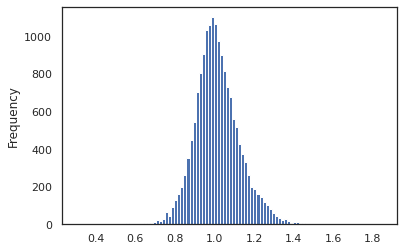

In [171]:
pandas.Series(y_pred_probs.sum(axis=1)).plot.hist(bins=100)

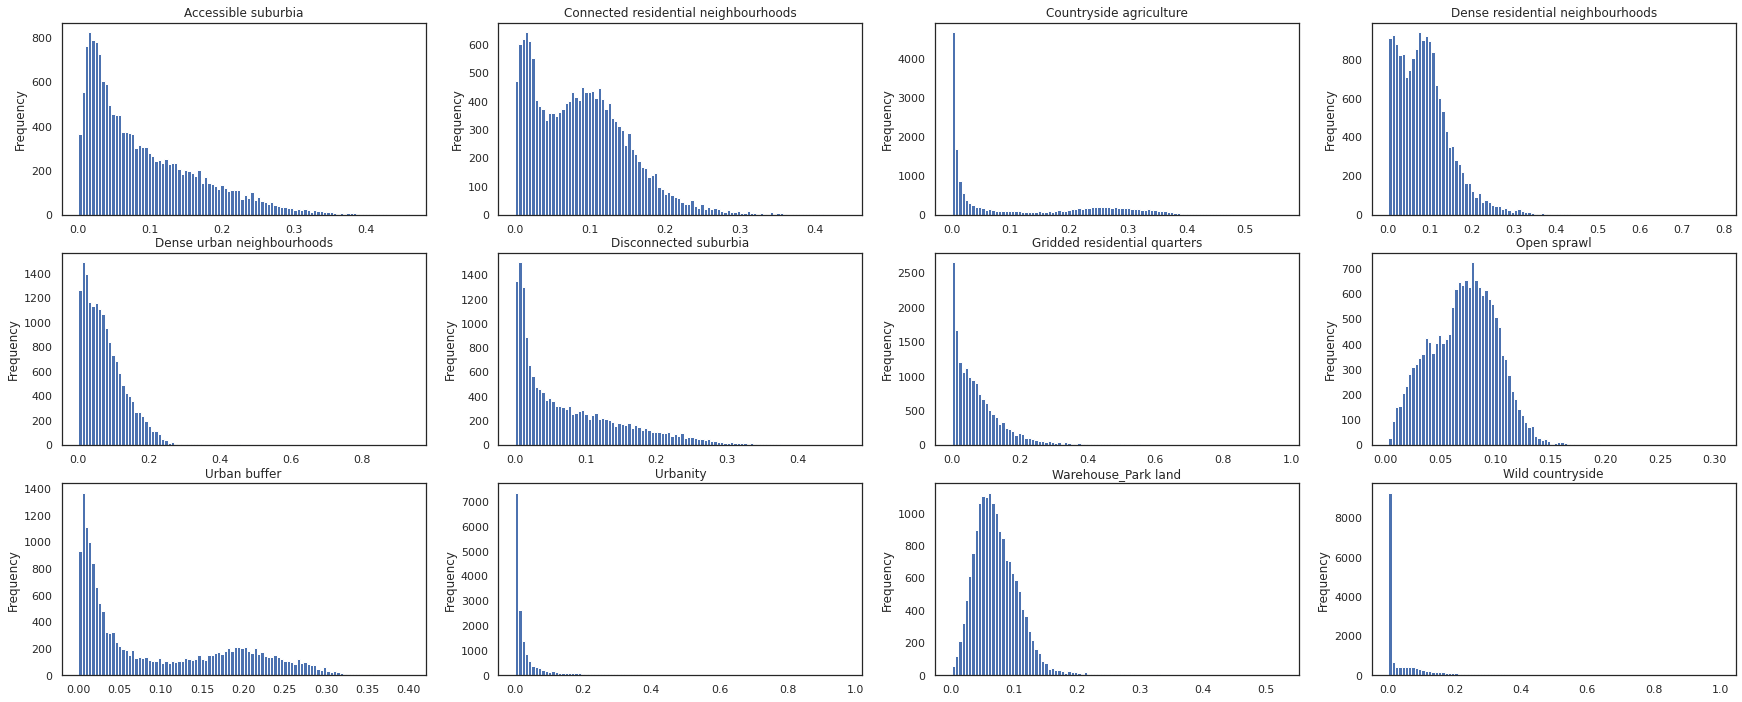

In [172]:
fig, axs = plt.subplots(3, 4, figsize=(30, 12))
for i, (n, ax) in enumerate(zip(sorted(r['meta_class_names']), axs.flatten())):
    pandas.Series(y_pred_probs[:, i]).plot.hist(bins=100, ax=ax)
    ax.set_title(n)